In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Memuat dataset
df = pd.read_csv('assets/heart_cleaned.csv')

In [67]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


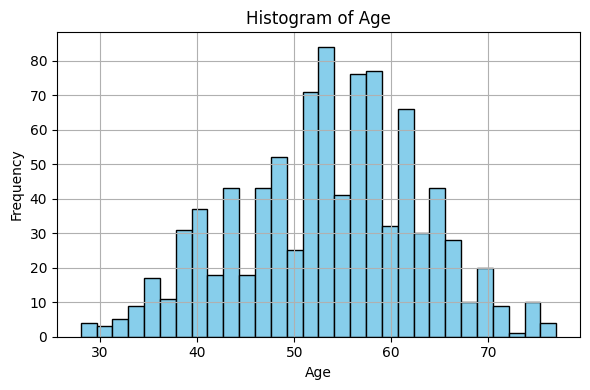

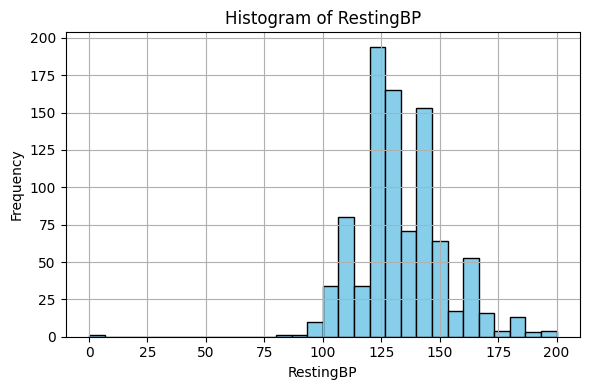

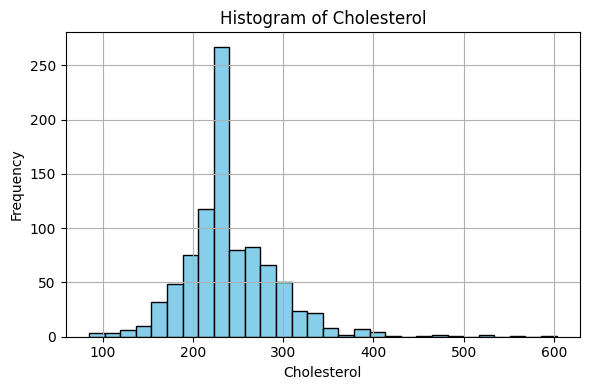

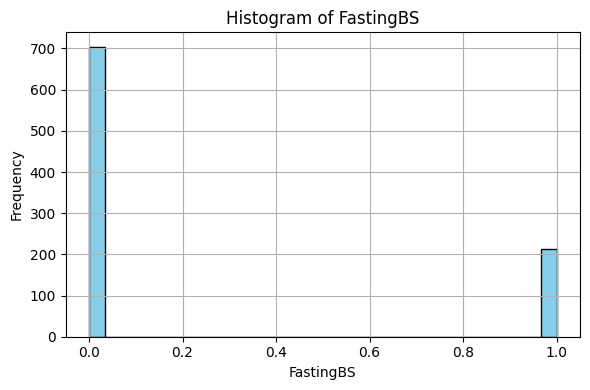

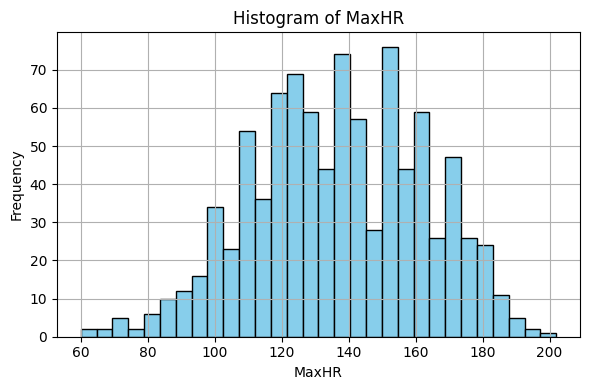

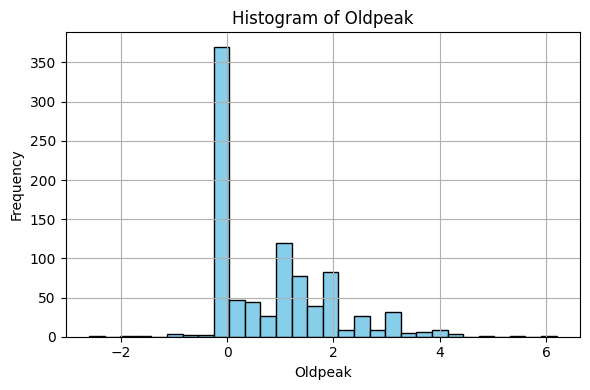

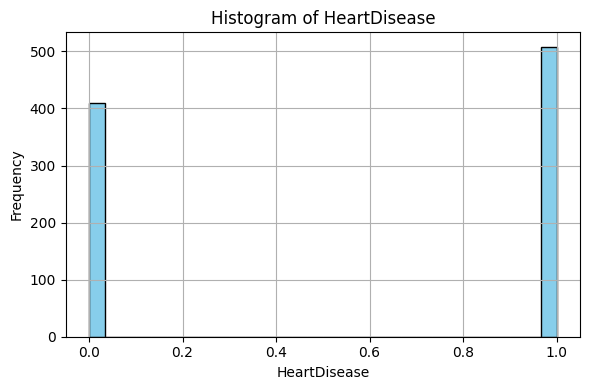

In [68]:
import matplotlib.pyplot as plt

# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns

# Loop setiap kolom dan tampilkan histogram 1 per 1
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [69]:
# One Hot Encoding untuk kolom kategorikal (jika ada)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols)

In [70]:

# Konversi semua kolom ke tipe integer
df = df.astype(int)

In [71]:
# Asumsi: kolom 'target' adalah label untuk klasifikasi
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [72]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Melakukan scaling fitur agar model SVC bekerja optimal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
# Membuat dan melatih model SVC
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [75]:
# Memprediksi data uji
y_pred = svc.predict(X_test_scaled)

In [76]:
# Menampilkan hasil evaluasi
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[66 11]
 [16 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [77]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [78]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8533

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [79]:
print(df.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [80]:
print(df.isnull().sum())


Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


In [81]:
df.fillna(df.median(), inplace=True)


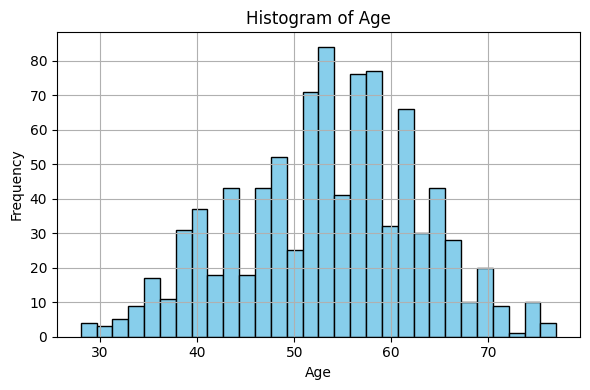

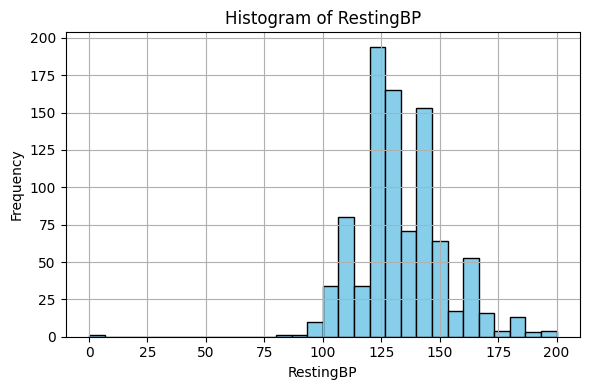

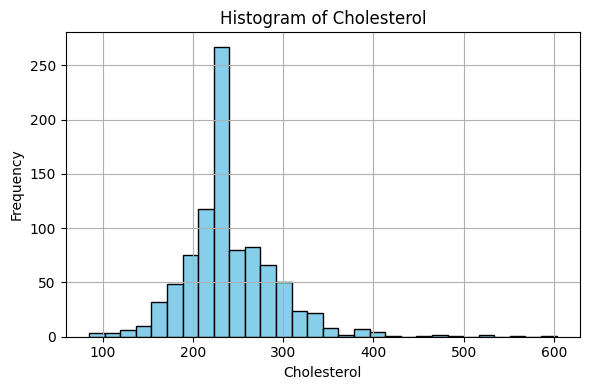

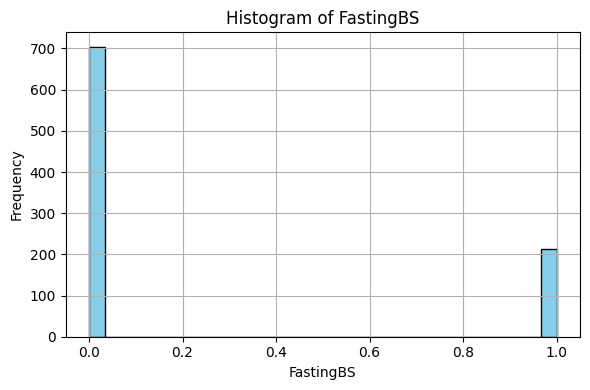

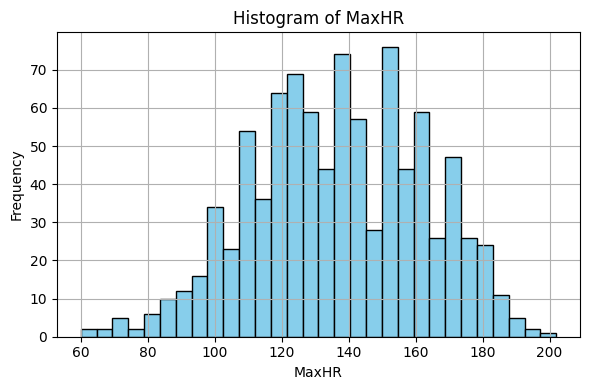

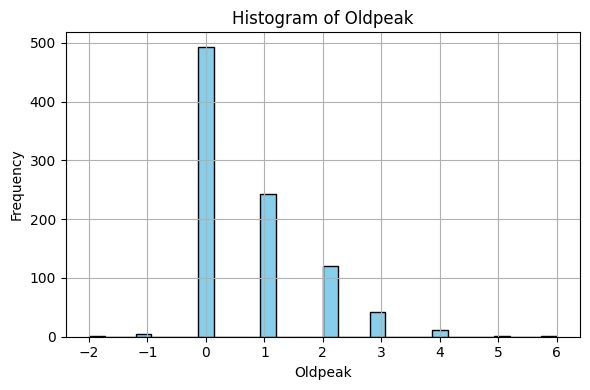

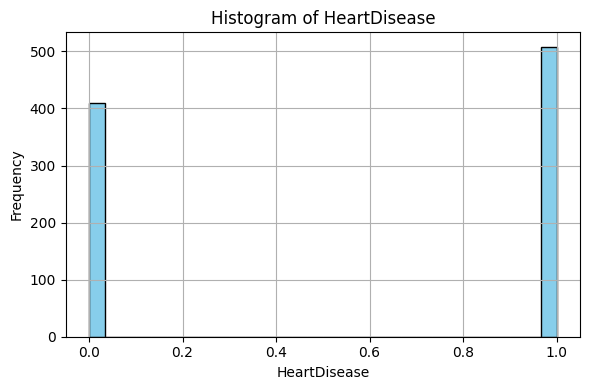

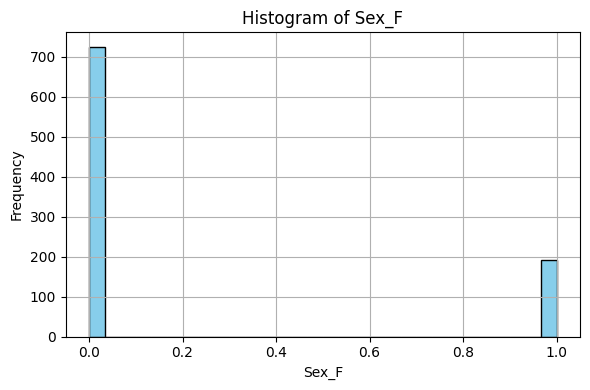

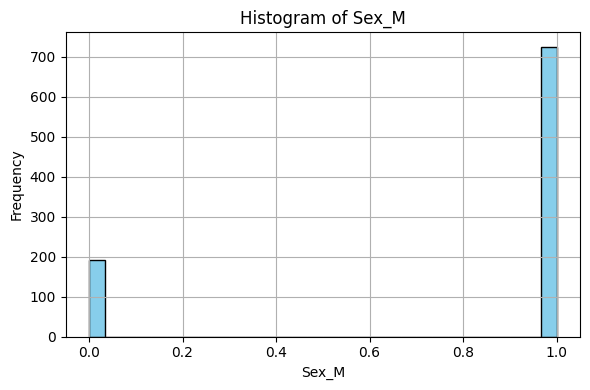

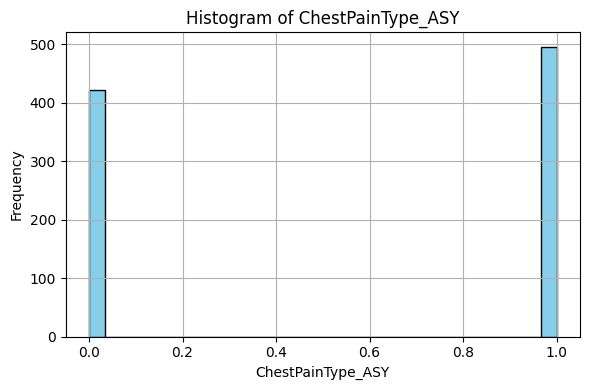

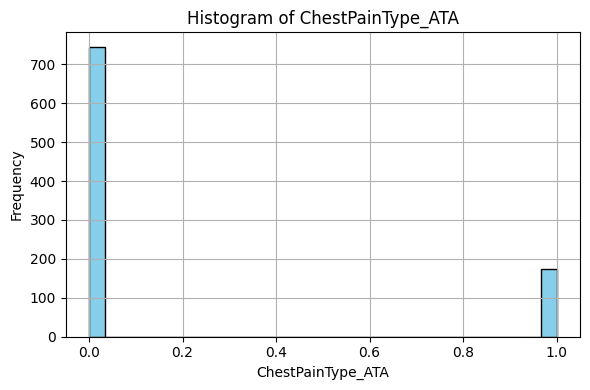

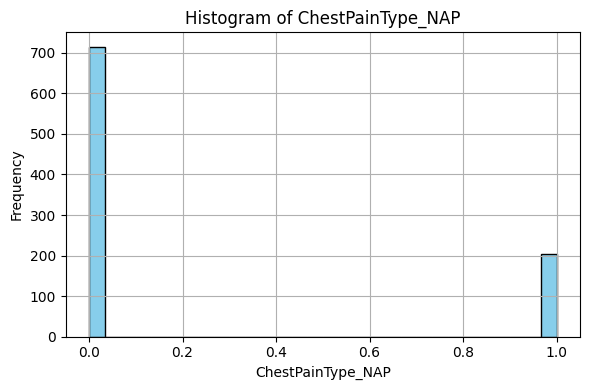

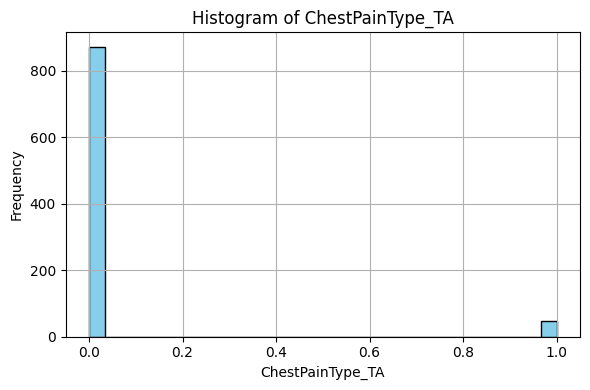

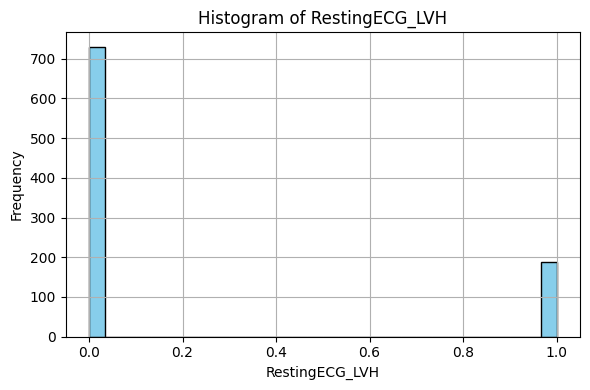

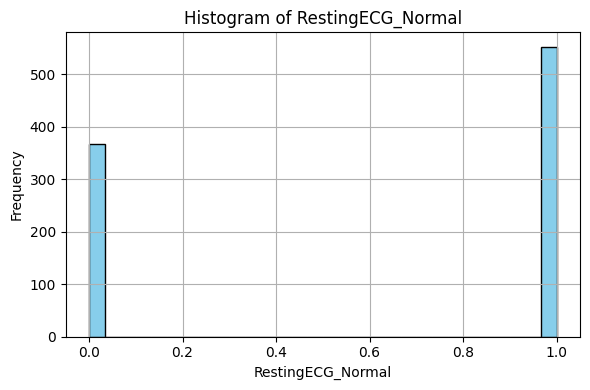

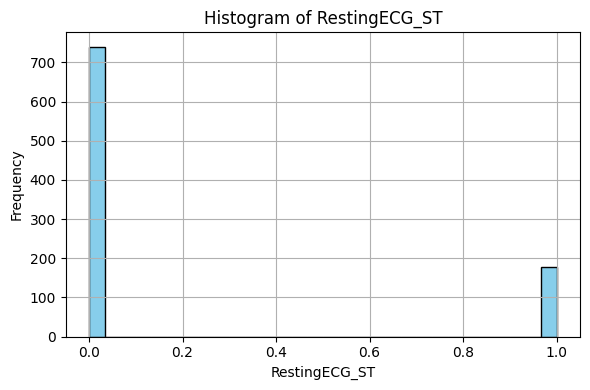

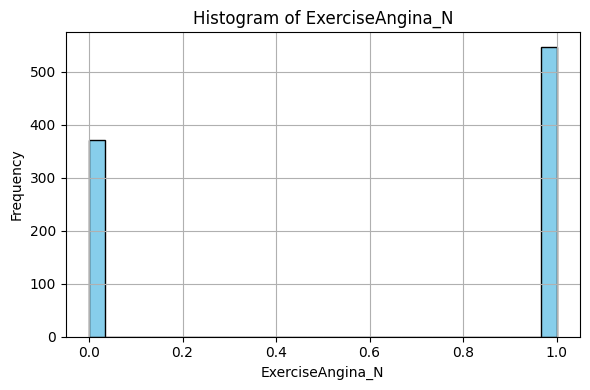

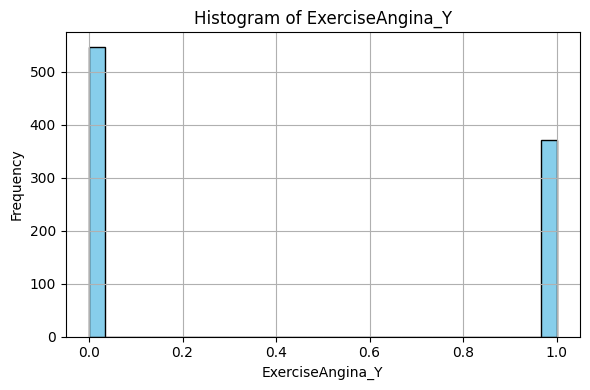

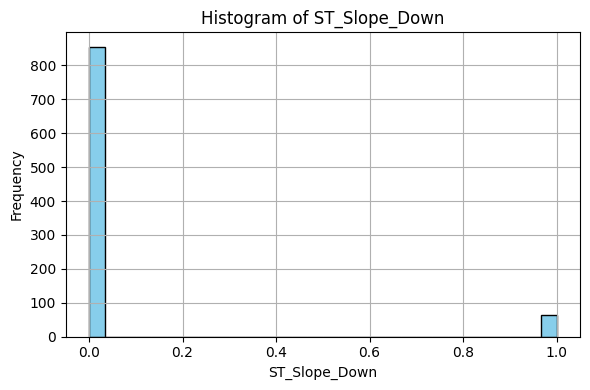

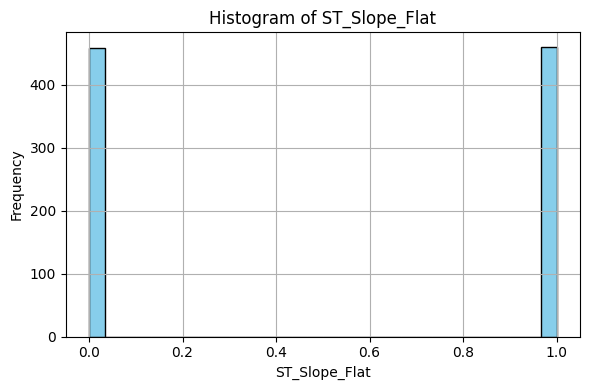

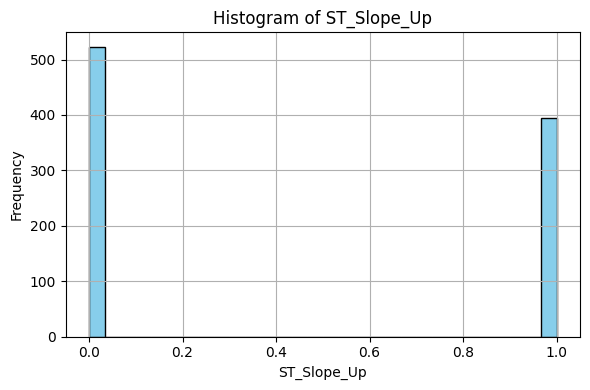

In [82]:
import matplotlib.pyplot as plt

# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns

# Loop setiap kolom dan tampilkan histogram 1 per 1
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


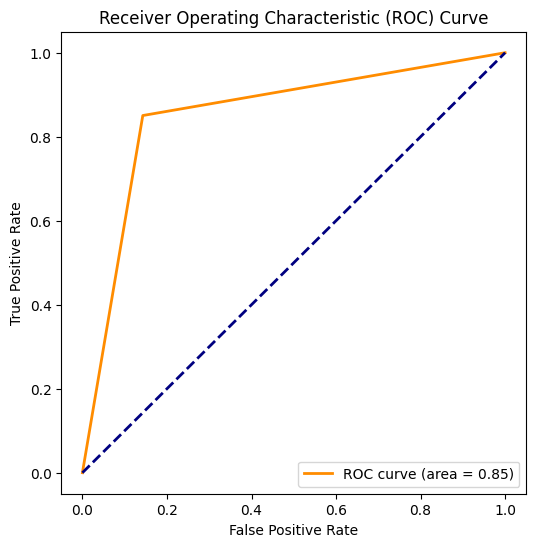

In [83]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

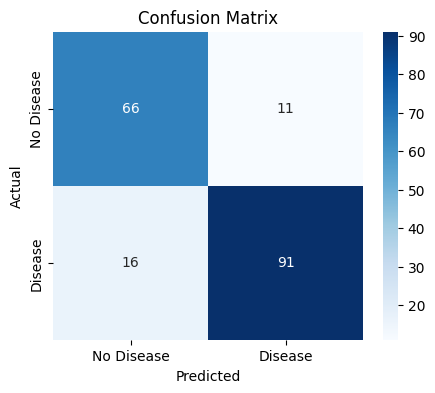

In [84]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

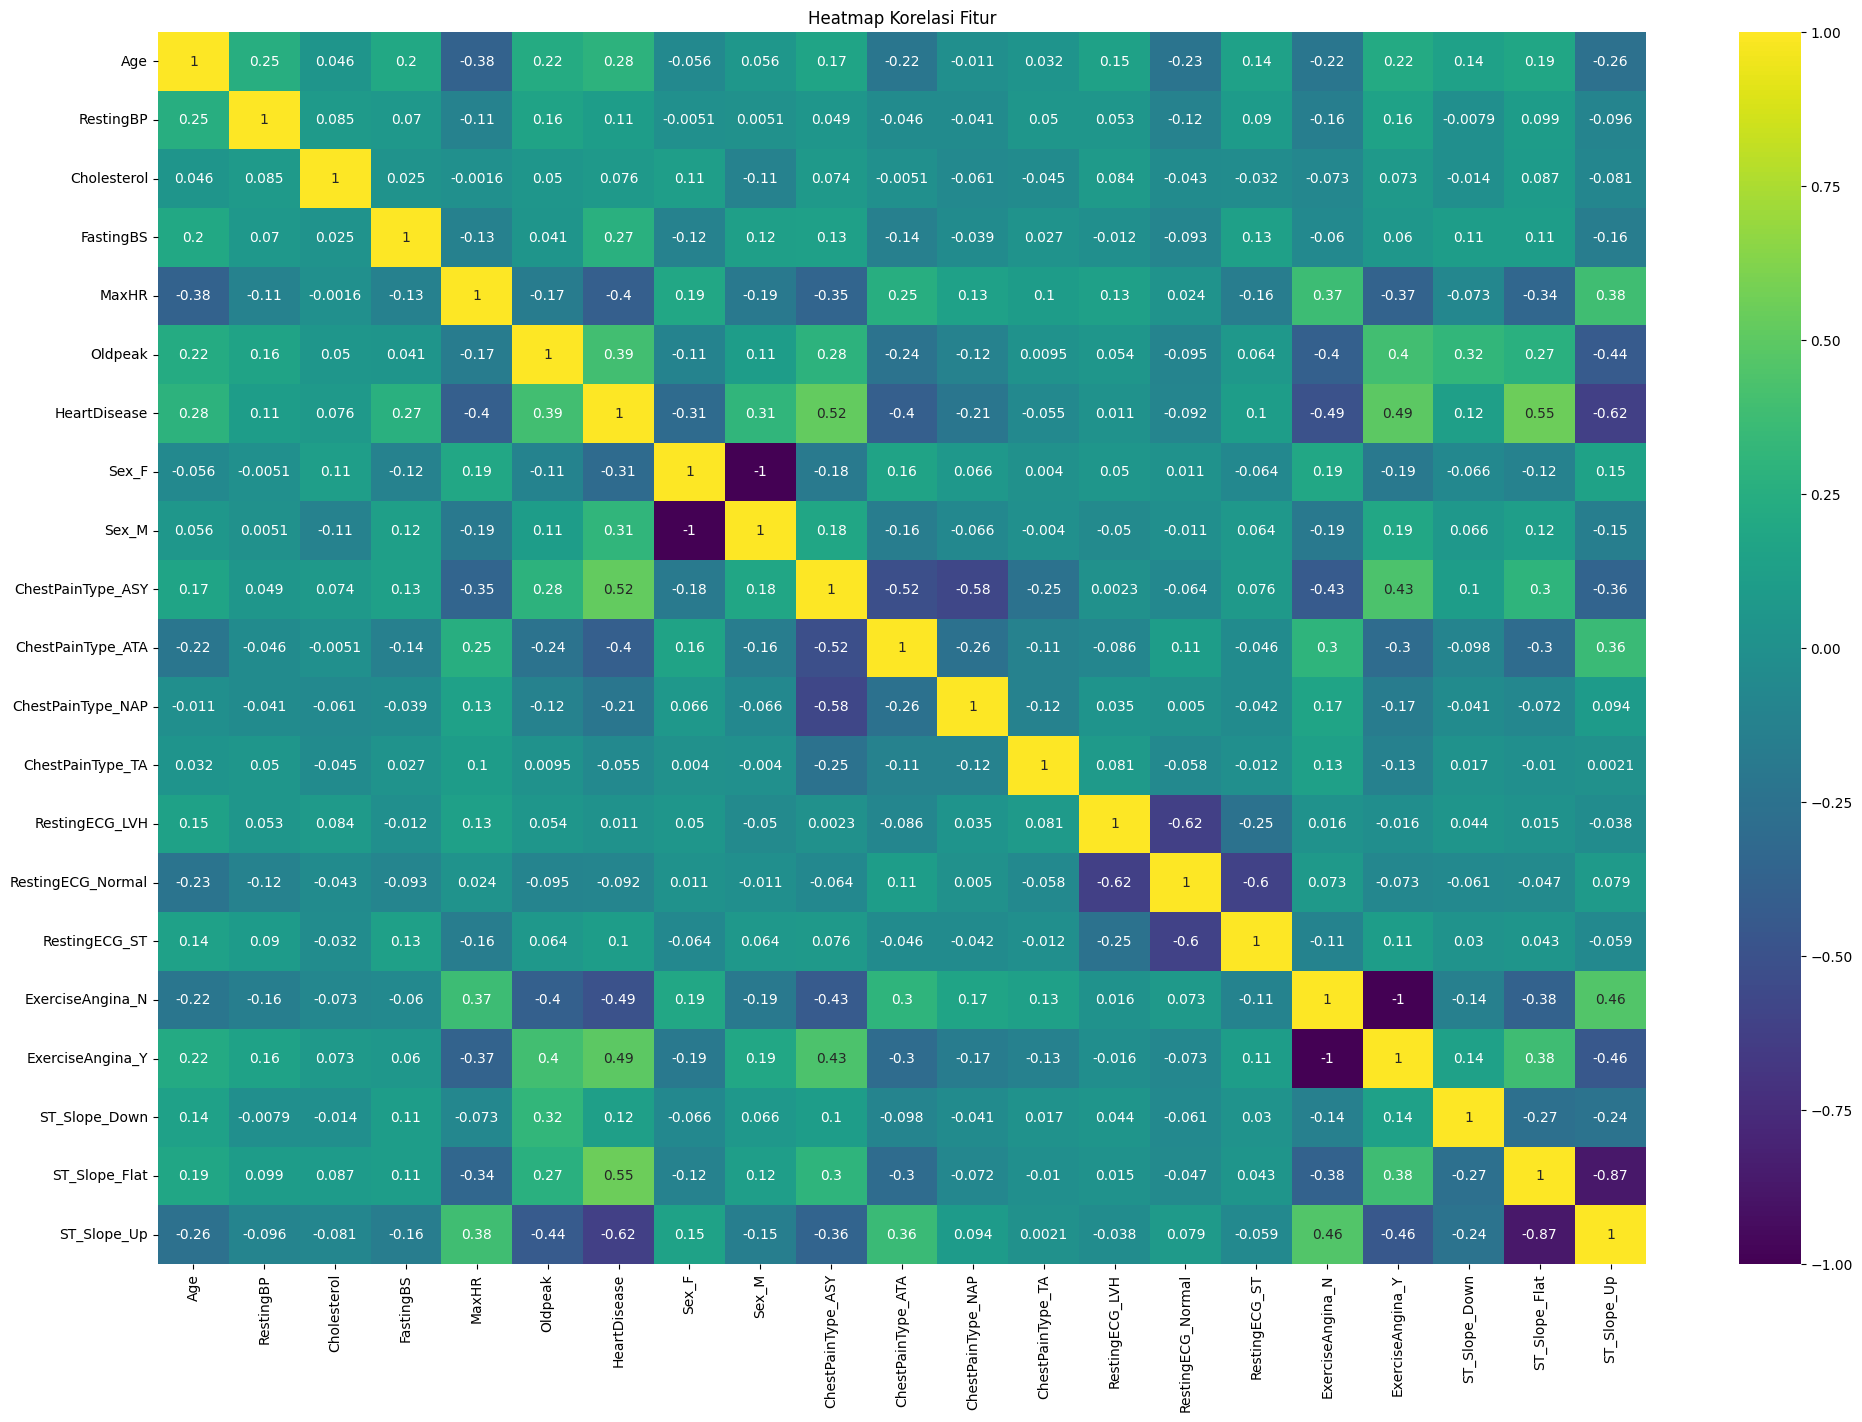

In [85]:
correlation_matrix = df.corr()

# Membaut heatmap menggunakan seaborn
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [86]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)

# Menampilkan hasil
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"Precision:{precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy Score: 0.8533
Recall Score: 0.8505
Precision:0.8922
F1 Score: 0.8708


In [87]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Prediksi di data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)

# Menampilkan hasil
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"Precision:{precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy Score: 0.8804
Recall Score: 0.8692
Precision:0.9208
F1 Score: 0.8942


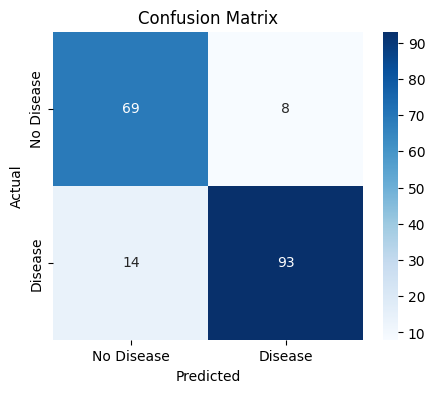

In [88]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [89]:
from sklearn.linear_model import LogisticRegression

# Buat dan latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi di data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)

# Menampilkan hasil
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"Precision:{precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy Score: 0.8641
Recall Score: 0.8505
Precision:0.9100
F1 Score: 0.8792


C:\Users\alvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


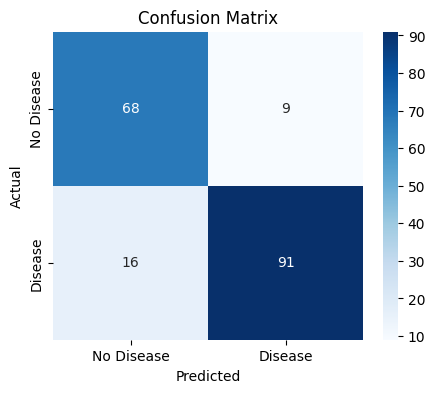

In [90]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [91]:
import pandas as pd

data = pd.read_csv("assets/heart_cleaned.csv")
train_data = data.sample(frac=0.8, random_state=42)
val_data = data.drop(train_data.index)
val_data.to_csv("data_validasi.csv", index=False)
